**Customer Churn Prediction for NaijaConnect**

**Introduction**

In today's competitive telecom industry, customer retention is crucial to sustaining growth and profitability. At NaijaConnect, a leading Nigerian telecom company offering internet and phone services nationwide, we have observed that some customers are discontinuing their services.

This analysis aims to identify patterns and key factors that contribute to customer churn , using data to build a predictive model that highlights which customers are at high risk of leaving. By understanding these indicators, we can implement targeted retention strategies to reduce churn rates and enhance customer loyalty. My task is to uncover the churn-driving factors to support effective decision-making.

**Analysis Objective**

The objective of this analysis is to closely examine customer data to find patterns and trends that can help explain why some customers are leaving. This will include creating visual summaries to clearly show important customer bahaviors and characteristics linked to churn. The next step is to build a machine learning model that can predict which customers are most likely to stop using our services. By identifying these customers early, this analysis will provide useful insights to guide effective customer retention strategies.

**Data Description**

The dataset contains information on customer demographics, subscription details and usage patterns.

**Data Dictionary**
The dataset include the following columns:

* *gender, Seniorcitizen, Partner, Dependents* : Demographic information about
customers.
* *tenure, PhoneService, Multiplelines, InternetService, etc* : Details on the services each customer subscribes to and the length of contract.
* *Contract, PaperlessBilling, PaymentMethod* : Contract types and billing preferences.
* *MonthlyCharges, TotalCharges* : Financial aspects of each customer account.
* *Churn*: Target variable indicating whether the customer churned (Yes or No).




# **Data Import and Data Cleaning**

**Importing the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import files
uploaded = files.upload() #Importing the data

Saving Customer-Churn.csv to Customer-Churn.csv


In [3]:
data = pd.read_csv('Customer-Churn.csv') #Stored the data in a variable called "data"

**Understanding the Structure of the Data**

In [4]:
data.head(10) #Returns the first 10 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


**Observation:**

The data contains a total of 21 columns

**Let us see the number of rows and columns present in the data**

In [5]:
#Get the number of rows and columns

rows,columns = data.shape
print(f"The data has {rows} rows and {columns} columns")

The data has 7043 rows and 21 columns


**Let us see the data types of the columns in the dataset**

In [6]:
#Display the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


While the other columns have the appropriate data types, the column *Total Charges* has the wrong data type (object), which will be converted to a float data type (float64).

In [7]:
#Covert Total Charges column data type to float
data["TotalCharges"] = data["TotalCharges"].astype(float)

ValueError: could not convert string to float: ' '

**Observations:**

I encountered an error while converting the TotalCharges column from an object data type to a float. Investigating further, I found that this error was due to empty cells in the TotalCharges column. Pandas did not recognize these empty cells as missing values, as shown in the output of data.info(), which indicated no missing values. Upon closer examination, I realized these cells contained empty strings or strings with only whitespace which Pandas does not automatically consider as missing (NaN) values.

To address this, I decided to calaulate TotalCharges for these empty cells by using the formula (tenure * Monthly Charges). After filling in these values, I proceeded to change the data type of the column to float.

In [8]:
#Replacing NaN values in the TotalCharges Column

#First, I converted the NaN values to missing values using pd.NA function.
#This converts the white spaces to missing values and then make it easy to carry out a replacement of those values

data["TotalCharges"] = data["TotalCharges"].replace(" ", pd.NA)

#Replacing the missing values by multiplying tenure with monthlycharges
data["TotalCharges"] = data["TotalCharges"].fillna(data["tenure"] * data["MonthlyCharges"])

#Converting the TotalCharges column to float
data["TotalCharges"] = data["TotalCharges"].astype(float)

#Confirming that the data type for TotalCharges has changed
data["TotalCharges"].dtype

dtype('float64')

**Observation**

Data type for *TotalCharges* has been successfully changed from object to float.

**Let us check for missing values or inconsistencies and handle them appropriately.**

In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


**Observation:**

There are no missing values in the data. The data is clean and ready for further analysis.


**Summary Statistics for Numerical Columns**

In [9]:
data.describe() #To understand the distribution of the data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**Observations:**

**Senior Citizen:** There are 7043 record counts which indicates no missing value. The mean of Senior Citizen in this data set is 0.162, suggesting that around 16.2% of customers are senior citizens.

**Tenure:** Tenure shows a wide range of values from new customers (0 months) to those with a tenure of up to 72 months. The average tenure is around 32 months, but there is a large spread, with many customers having both short and long tenures. A quarter of customers have been with the company for 9 months or less while half have a tenure of 29 months or less.

**Monthly Charges:** Monthly charges also vary considerably, averaging around 64.76. There is a moderate spread with charges ranging from as low as 18.25 to a high of 118.75. Half of the customers pay 70.35 or less, but a quarter of them pay under 35.50, showing a mix of low and high-paying customers.

**Total Charges:** On avergae, customers have paid around 2279, with some totals reaching up to 8684, due to a combination of longer tenure and paying higher monthly rates.

# **Exploratory Analysis**


*  **A pie chart to give an overview of churned customers**


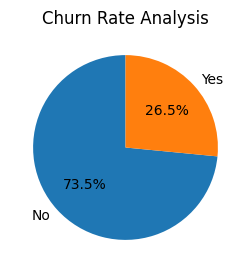

In [10]:
#Pie chart
Churn_rate_analysis = data["Churn"].value_counts()
plt.figure(figsize=(3,3))
plt.pie(Churn_rate_analysis, labels=Churn_rate_analysis.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Rate Analysis')
plt.show()


**Observations:**

The pie chart represents the churn rate for customers, showing the proportion of customers who have left (churned) versus those who have stayed with the company.

**No (73.5%):** This large blue segment indicates that 73.5% of customers are active (equivalent to about 5,117 users), meaning they continue to use the company's services.

**Yes (26.5%):** The smaller orange segment represents 26.5% of customers who have churned or inactive (equivalent to about 1,886 users), indicating that they have discontinued their subscriptions.

The analysis shows that while the majority of customers remain with the company, a significant portion (over a quarter) has churned, suggesting a potential area of improvement in customer retention. Identifying the factors that contribute to this 26.5% churn rate could help the company develop strategies to reduce churn and retain more customers.

* **Customer Loyalty**

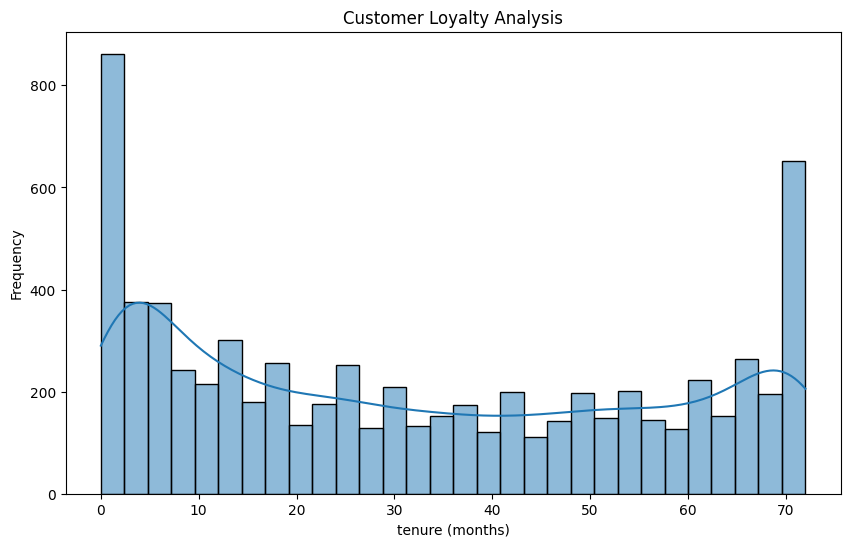

In [11]:
#Tenure Analysis

plt.figure(figsize=(10,6))
sns.histplot(data["tenure"], bins=30,kde = True)
plt.title("Customer Loyalty Analysis")
plt.xlabel("tenure (months)")
plt.ylabel("Frequency")
plt.show()

**Observation:**

NaijaConnect has a high number of short-tenured customers, which can contribute immensely to churning. Research has shown that new customers of a brand demonstrate less loyalty to the brand in comparison to long-term customers.

* **Gender Churn Rate Analysis**

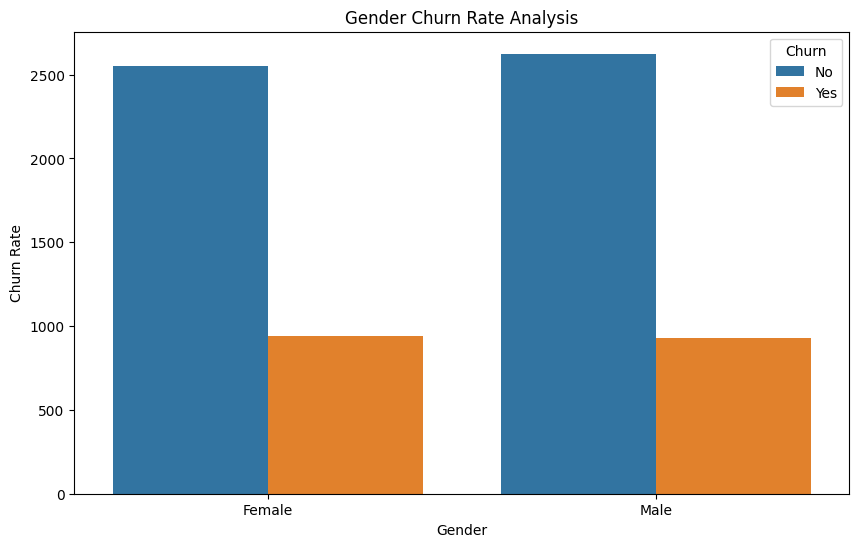

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x="gender", hue="Churn", data=data)
plt.title("Gender Churn Rate Analysis")
plt.xlabel("Gender")
plt.ylabel("Churn Rate")
plt.show()

**Observation:**

The count shows that churn occurs for both genders, but neither group is disproportionately affected. The number of male and female customers who churned is roughly similar, suggesting that gender have is not a strong reason customers churn.

* **Customer Versus Churn Rate Analysis**



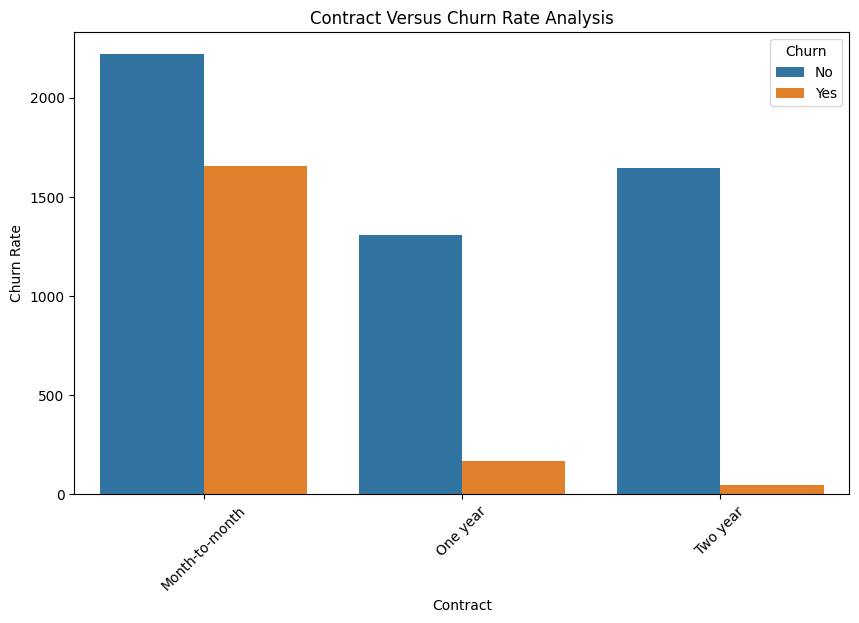

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x="Contract",hue = "Churn")
plt.title("Contract Versus Churn Rate Analysis")
plt.xlabel("Contract")
plt.ylabel("Churn Rate")
plt.xticks(rotation=45)
plt.show()

**Observations:**

Customers with month-to-month contracts have a notably higher churn rate to those with long-term contracts (one or two years). This suggests that flexible, short-term commitments is a huge factor in churn.

**Internet Service Versus Churn Rate Analysis**

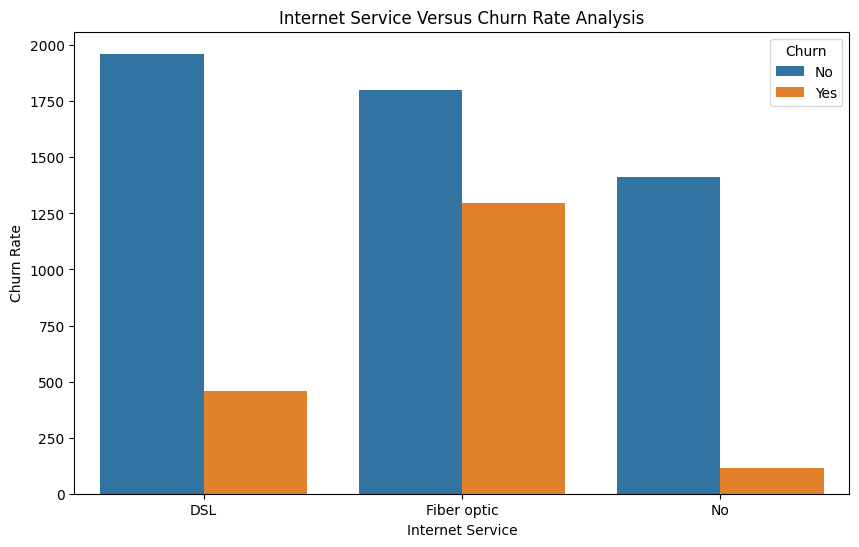

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x="InternetService",hue = "Churn")
plt.title("Internet Service Versus Churn Rate Analysis")
plt.xlabel("Internet Service")
plt.ylabel("Churn Rate")
plt.xticks()
plt.show()

**Observations:**
Churn is higher among customers using Fiber Optic Internet compared to DSL and No Internet Service. Although Fibre-optic internet is faster and more reliable than DSL, availibility and cost can be deciding factors for customers.

* **Paperless Billing Versus Churn Rate Analysis**

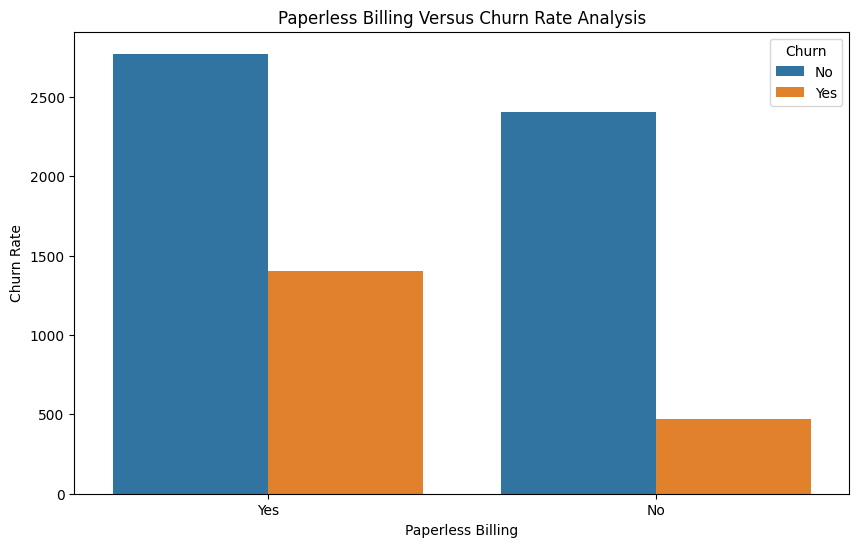

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x="PaperlessBilling",hue = "Churn")
plt.title("Paperless Billing Versus Churn Rate Analysis")
plt.xlabel("Paperless Billing")
plt.ylabel("Churn Rate")
plt.show()

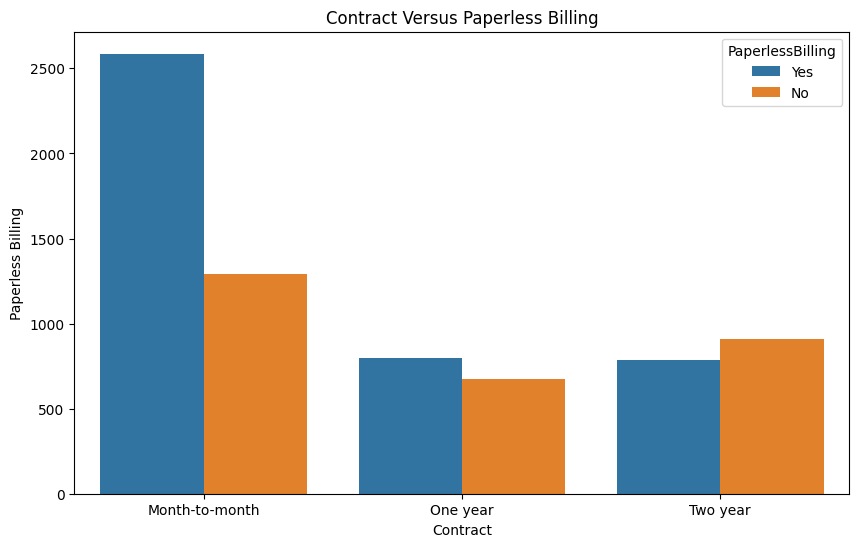

In [16]:
#Checked for relationship between paperless billing and contracts
plt.figure(figsize=(10,6))
sns.countplot(data=data, x="Contract",hue = "PaperlessBilling")
plt.title("Contract Versus Paperless Billing")
plt.xlabel("Contract")
plt.ylabel("Paperless Billing")
plt.show()

**Observations:**

Customers with paperless billing have a higher churn rate, possibly because it is more common among short-term contracts.  

* **Payment Method Versus Churn Analysis**

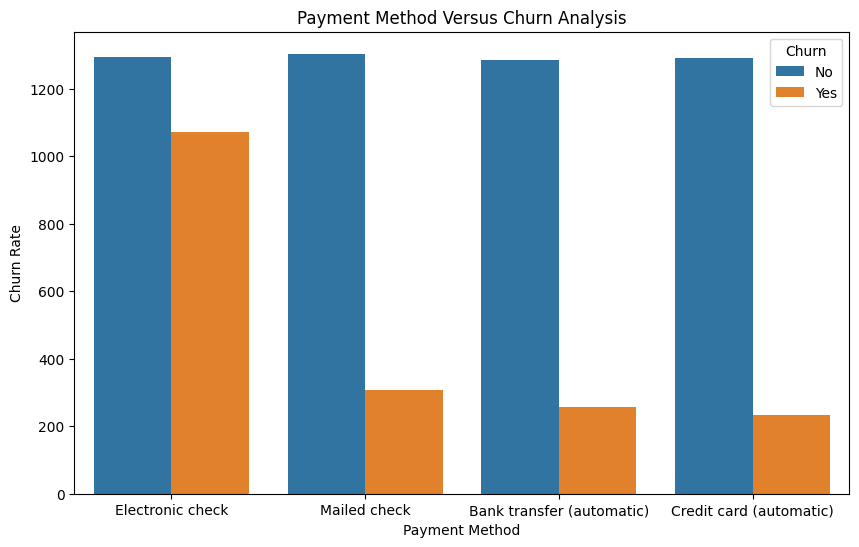

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x="PaymentMethod",hue = "Churn")
plt.title("Payment Method Versus Churn Analysis")
plt.xlabel("Payment Method")
plt.ylabel("Churn Rate")
plt.show()

**Observarions:**

Customers who pay through electronic checks show higher churn compared to other methods like credit cards or bank transfers, which are more convenient and faster for customers. This indicates a correlation between electronic check payments and less customer satisfaction.

**Relationship between Monthly Charges, Total Charges and Churned Customers**

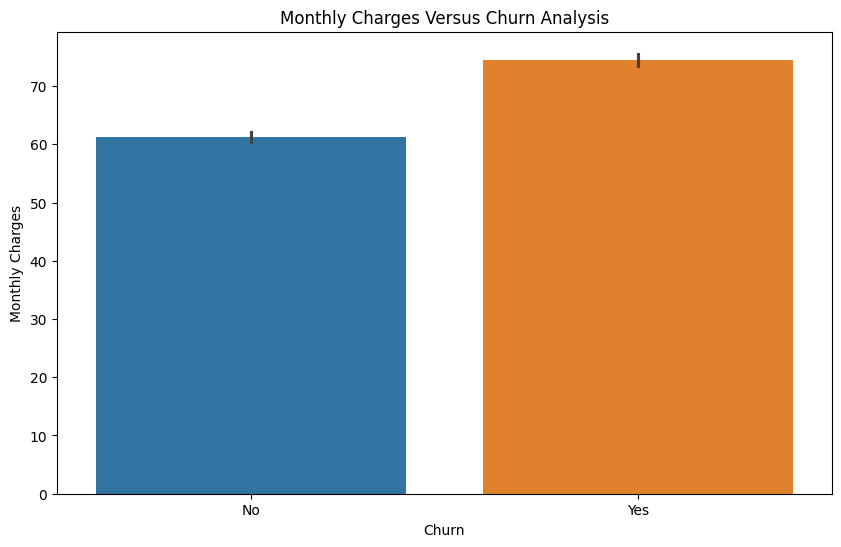

In [18]:
#Monthly Charges versus Churn Analysis

plt.figure(figsize=(10,6))
sns.barplot(data=data, x="Churn", y="MonthlyCharges", hue = "Churn")
plt.title("Monthly Charges Versus Churn Analysis")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

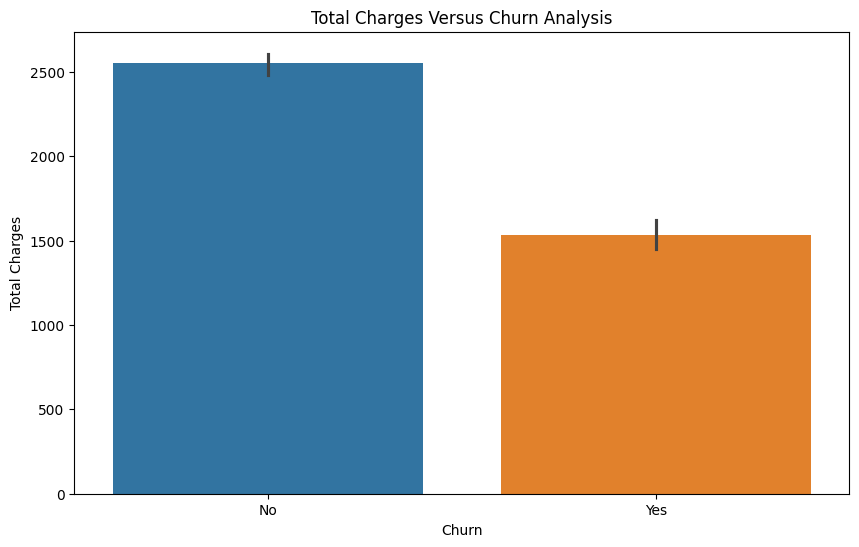

In [19]:
#Total charges versus Churn Analysis

plt.figure(figsize=(10,6))
sns.barplot(data=data, x="Churn", y="TotalCharges", hue = "Churn")
plt.title("Total Charges Versus Churn Analysis")
plt.xlabel("Churn")
plt.ylabel("Total Charges")
plt.show()

* The above chart shows that customers who churned had, on average, higher *Monthly Charges* compared to those customers that did not churn. In contrast, *Total Charges* was higher for customers who did not churn. This suggests that high monthly charges may contribute to churn, while long-term customers (with higher Total charges) tend to stay longer, indicating loyalty and satisfaction.

* **Correlation Review: Tenure, Monthly Charges and Total Charges**

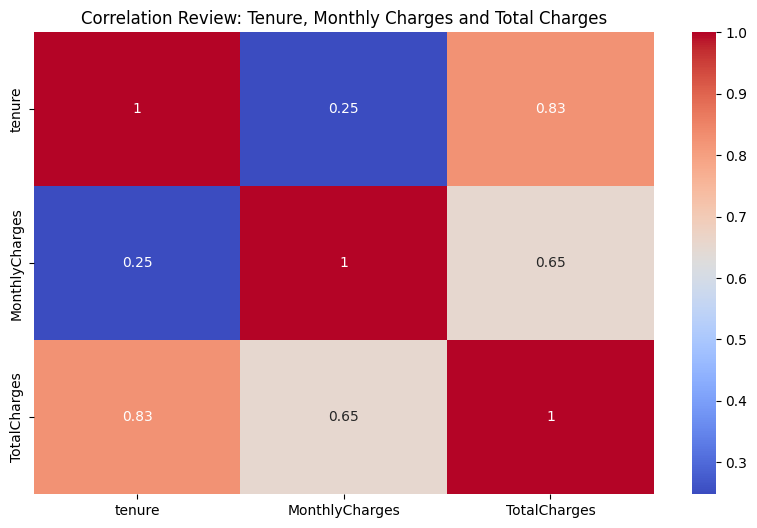

In [20]:
#Correlation between tenure, monthly charges and total charges using heatmap

correlation_matrix = data[["tenure", "MonthlyCharges", "TotalCharges"]].corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Review: Tenure, Monthly Charges and Total Charges")
plt.show()

**Observations:**

The heatmap above shows the correlations among *Tenure*, *Monthly Charges* and *Total Charges*:

* *Tenure* and *Total Charges* have strong positive correlation of 0.83, indicating that the longer a customer stays, the higher their total charges tend to be.
* *Monthly Charges* and *Total Charges* have a moderate correlation of 0.65, suggesting that higher monthly charges contribute to higher total charges.
* *tenure* and *Monthly Charges* have a weak positive correlation of 0.25.

# Data Preprocessing

**Encode categorical variables numerically for model compatibility**

In [21]:
categorical_cols = data.select_dtypes(include=['object']).columns #Stored categorical columns in the variable "categorical_cols"

In [22]:
label_encoder = LabelEncoder() #Introduced label encoder
data[categorical_cols] = data[categorical_cols].apply(lambda col: label_encoder.fit_transform(col)) #Encoded all categorical columns

In [23]:
data.head() #To view updated data (The encoded categorical features)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


**Normalize continuous features like *tenure*, *MonthlyCharges*, and *TotalCharges***

In [24]:
#Scale numerical feautures
scaler = StandardScaler()
data[["tenure", "MonthlyCharges", "TotalCharges"]] = scaler.fit_transform(data[["tenure", "MonthlyCharges", "TotalCharges"]])

In [25]:
data.head() #To view updated data (The scaled numerical features)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,-1.277445,0,1,0,0,...,0,0,0,0,0,1,2,-1.160323,-0.992611,0
1,3962,1,0,0,0,0.066327,1,0,0,2,...,2,0,0,0,1,0,3,-0.259629,-0.172165,0
2,2564,1,0,0,0,-1.236724,1,0,0,2,...,0,0,0,0,0,1,3,-0.362660,-0.958066,1
3,5535,1,0,0,0,0.514251,0,1,0,2,...,2,2,0,0,1,0,0,-0.746535,-0.193672,0
4,6511,0,0,0,0,-1.236724,1,0,1,0,...,0,0,0,0,0,1,2,0.197365,-0.938874,1


**Observations:**

Both categorical and numerical features have been encoded and normalized respectively.

# **Model Buiding**

* **Split the dataset into training and test sets**

In [26]:
#Defined features and targets

X = data.drop(columns=['Churn']) #Stored all columns excluding the target column (Churn) in the variable "X".
y = data['Churn'] #Stored target column in the varibale "y"

In [27]:
#Split the dataset into training and testing tests (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* **Use logistic regression to predict customer churn**

In [28]:
#Train a Logistic Regression Model
mymodel = LogisticRegression()
mymodel.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

* **Evaluate the model with metrics such as accuracy, precision, and recall**

In [29]:
prediction = mymodel.predict(X_test)

In [ ]:
#accuracy
accuracy = accuracy_score(y_test, prediction) * 100
print("Accuracy:", accuracy)

Accuracy: 81.61816891412349


**Observation:**

The model achieved an accuracy of 81.62%, indicating that it correctly classified around 81.62% of the customers in the test data as either churned or non-churned.

In [30]:
#precision
precision = precision_score(y_test, prediction) * 100
print("Precision:", precision)

Precision: 68.0379746835443


**Observation:**

A precision of 68.04% indicates that when the model predicts a customer will churn, it is correct about 68% of time. While this seems like a good precision score, it means that about 32% of the customers predicted to churn are actually wrong (false positives).

In [31]:
#recall
recall = recall_score(y_test, prediction) * 100
print(round(recall, 2)) #Used the round function to put result in two decimal places

57.64


**Observation:**
A recall of 57.64% shows that the model captures about 57.64% of customers who are truly at risk of leaving. The model failed to capture around 42% of the customers who actually churned.

# **Visualisations and Analysis**

* **Create a confusion matrix to analyze the model's performance and identify misclassifications.**

In [32]:
cm = confusion_matrix(y_test, prediction) #Compute the Confusion Matrix

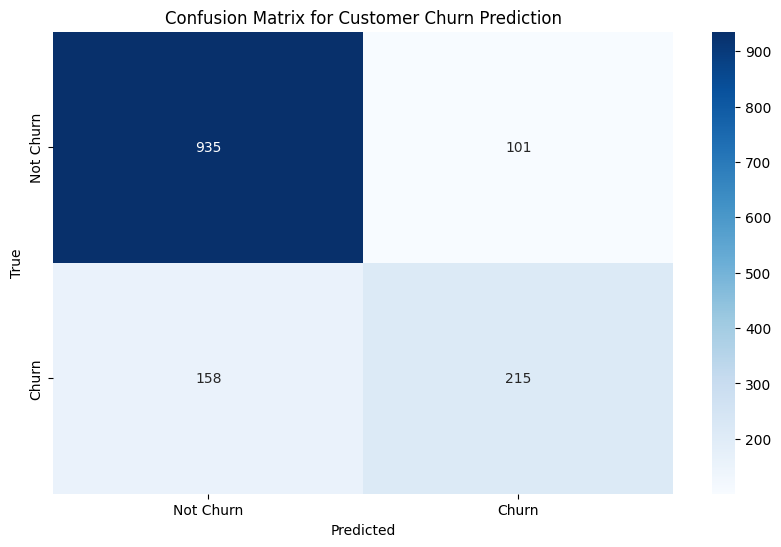

In [33]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix for Customer Churn Prediction')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Observations:**

* **Top Left (935 - True Negatives):** This represents the number of cases where the model correctly predicted "Not Churn" when  the actual value was also "Not Churn".

* **Top Right (101 - False Positives):** These are cases where the model predicted "Churn" but the actual value was "Not Churn".

* **Bottom Left (158 - False Negatives):** These represent cases where the model predicted "Not Churn" but the actual value was "Churn".

* **Bottom Right (215 - True Postivies):** This indicates the number of cases where the model correctly predicted "Churn".

Overall, the model showed a relatively high number of correct predictions but does have room for improvement, particularly in reducing false negatives and false positives.


# **Conclusions and Recommendations**

* **Factors that likely contributed to churn**

• **Contract Type:** Customers on month-to-month contracts exhibit significantly higher churn rates compared to those on annual or biennual contracts. This indicates that the lack of long-term committments makes it easier for these customers to leave.

• **Billing Preferences:** Paperless Biling is associated with higher churn likely because it is more common among customers with short-term contracts, who may already feel less attached to our service.

• **Payment Preference:**  Electronic check payments are strongly associated with higher churn rates, potentially indicating that customers using this manual payment method find it less convenient or engaging compared to automated alternatives.

• **Service Types and Costs:** Fiber Optic users churn more than customers using DSL on no internet services suggesting a dissatifcation with service quality or the higher costs associated with fiber optic. Furthermore, higher monthly charges correlate with increased churn.

• **Tenure:** Shorter tenured customers are much likely to churn, which suggests that early customer experiences strongly influence retention. Lack of engagement or dissatisfaction in the first few months may prompt these customers to leave.


* **Recommendations**

**Address High-Risk Customers:**
1. **Enhance Customer Onboarding Experience:** Create a dedicated onboarding program for new customers to ensure they are fully utilizing our services and addressing issues early. This could include personalized tutorials, one-on-one support, etc.

2. **Loyalty Rewards for High-Paying Customers:** Develop loyalty programs for customers with high monthy charges. For example, customers spending over N8O/month could receive benefits like data boost.

3. **Early Warning System:** Develop an early warning system using the predictive churn model to flag high-risk customers within the first months of their contract. Deploying retention officers to engage these customers and resolve their pain points.

**Encourage Long-Term Contracts:**
1. **Discount Programs:** Offer fnancal incentives, such as a 10-15% discount for customers who switch from month-to-month plan to a one or two-year contract.

2. **Value-Added Services:** Include perks such as free months, or priority customer support to customers who commit to longer contracts.

**Optimize Billing Experiences to Build Trust:**
1. **Payment Method Conversion:** Provide one-time discounts or loyalty points to customers who switch from electronic payments to automated payment options like credit card or bank transfer. This can increase convenience and reduce churn.

By implementing these strategies, Naijaconnect, can improve customer satifaction and drastically reduce churn rate.
